<a href="https://colab.research.google.com/github/hasanaliozkan-dev/datacamp_img_processing/blob/main/DataCampImgProcessingLesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Load images***
In this chapter, we'll work with sections of a computed tomography (CT) scan from The Cancer Imaging Archive. CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.

In [ ]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

### ***Metadata***
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

After reading in the image, use im.meta to select the true statement from the list below.

In [ ]:
# Import ImageIO
import imageio
im = imageio.imread('chest-220.dcm')

# Print the available metadata fields
print(im.meta.keys())

### ***Plot images***
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
plt.axis('off') removes axis and tick labels from the image.
For this exercise, plot the CT scan and investigate the effect of a few different parameters.

In [ ]:
# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

# Draw the image in grayscale
plt.imshow(im, cmap="gray")

# Render the image
plt.show()


# Draw the image with greater contrast
plt.imshow(im, cmap="gray",vmin=-200, vmax=200)

# Render the image
plt.show()

# Remove axis ticks and labels
plt.axis("off")

# Render the image
plt.show()

Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

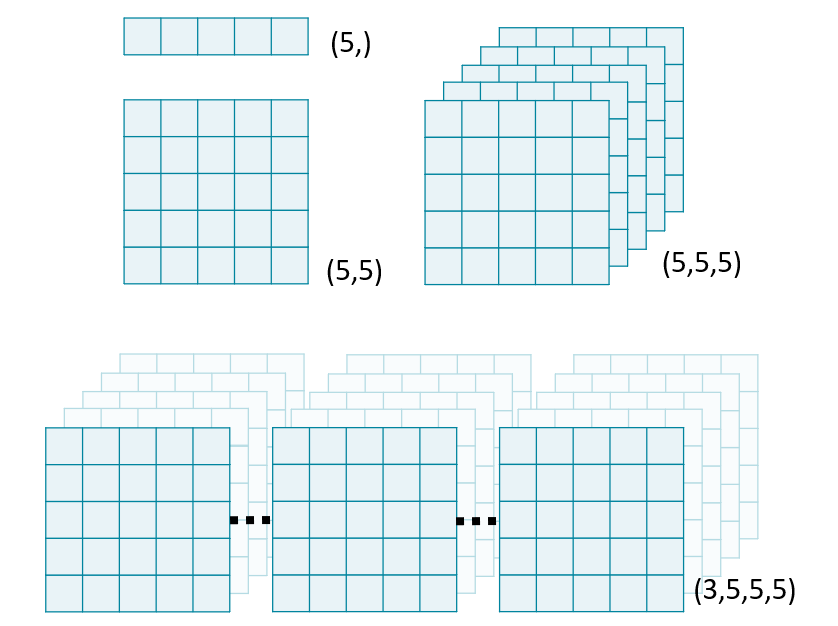



In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.

In [ ]:
# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1,im2,im3],axis=0)
print('Volume dimensions:', vol.shape)

### ***Load volumes***
ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "tcia-chest-ct" folder, which contains 25 DICOM images.

In [ ]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")
# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

### ***Generate subplots***
You can draw multiple images in one figure to explore data quickly. Use plt.subplots() to generate an array of subplots.

`fig, axes = plt.subplots(nrows=2, ncols=2)`

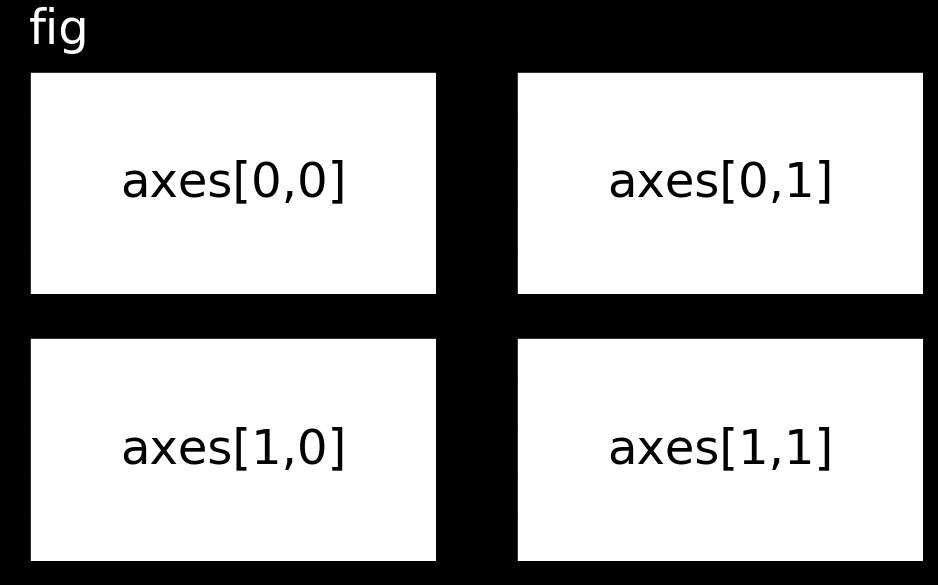

To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: axes[0,0].imshow(im) rather than plt.imshow(im).

For this exercise, draw im1 and im2 on separate subplots within the same figure.

In [ ]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2,ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1,cmap="gray")
axes[1].imshow(im1,cmap="gray")

# Remove ticks/labels and render
axes[0].axis("off")
axes[1].axis("off")
plt.show()

### ***Slice 3D images***
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

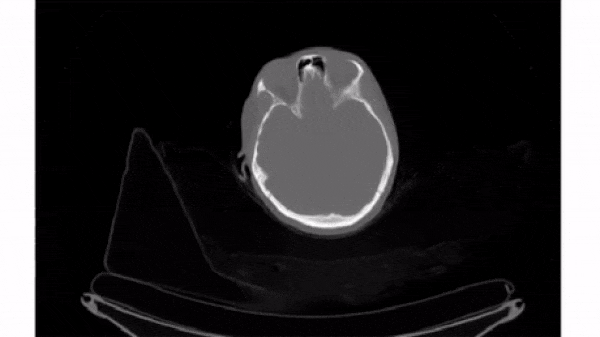

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]

For this exercise, use for loop to plot every 40th slice of vol on a separate subplot. matplotlib.pyplot (as plt) has been imported for you.

In [ ]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1,ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii*10,:,:]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis("off")
    
# Render the figure
plt.show()

### ***Plot other views***
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.
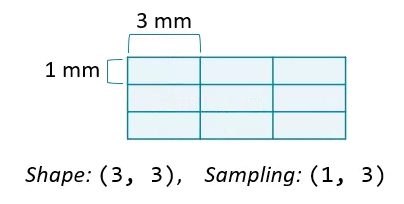


Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.

In [ ]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()

### ***Intensity***
In this chapter, we will work with a hand radiograph from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

All exercises in this chapter have the following imports:



```
import imageio
import numpy as np
import matplotlib.pyplot as plt
```



In [ ]:
# Load the hand radiograph
im = imageio.imread('hand-xray.jpg')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()
format_and_render_plot()

### ***Histograms***
Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im,min=0,max = 255,bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()

### ***Create a mask***
Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

Below is the histogram of im colored by the segments we will plot.

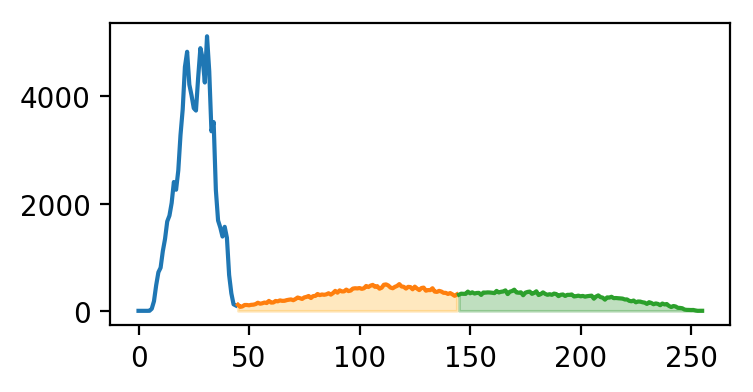

In [ ]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot()

### ***Apply a mask***
Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

NumPy's where() function is a flexible way of applying masks. It takes three arguments:

`np.where(condition, x, y)`

condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.

Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im).

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, 1,255,255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone)
axes[1].plot(hist)
format_and_render_plot()

### ***Tune a mask***
Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges
binary_erosion: Remove pixels along edges
binary_opening: Erode then dilate, "opening" areas near edges
binary_closing: Dilate then erode, "filling in" holes
For this exercise, create a bone mask then tune it to include additional pixels.

For the remaining exercises, we have run the following import for you:



```
import scipy.ndimage as ndi
```



In [ ]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
format_and_render_plot()

### ***Filter convolutions***
Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.
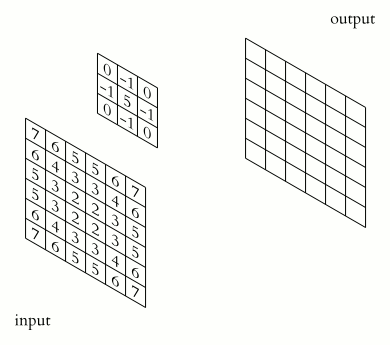


For this exercise, smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.

In [ ]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
format_and_render_plot()

### ***Smoothing***
Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.
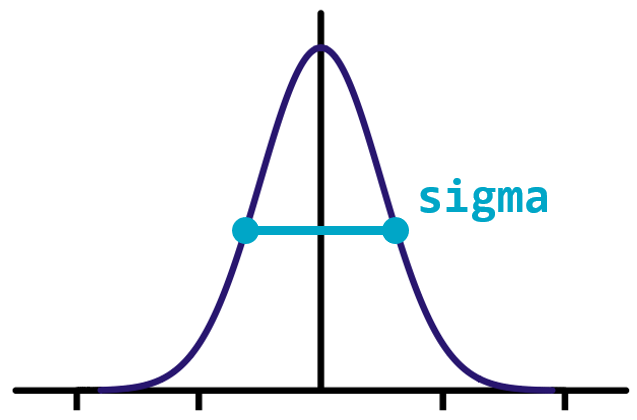


The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

For this exercise, test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.

In [ ]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1 >= 145)
axes[2].imshow(im_s3 >= 145)
format_and_render_plot()

### ***Detect edges (1)***
Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:



```
weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]
```
For this exercise, create a vertical edge detector and see how well it performs on the hand x-ray (im).

In [ ]:
# Set weights to detect vertical edges
weights = [[1,0,-1], [1,0,-1], [1,0,-1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im,weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()

### ***Detect edges (2)***
Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:


One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:

```
weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]
```

For this exercise, improve upon your previous detection effort by merging the results of two Sobel-filtered images into a composite edge map.

In [ ]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, cmap = 'gray',vmax=75)
format_and_render_plot()

Segment the heart
In this chapter, we'll work with magnetic resonance (MR) imaging data from the Sunnybrook Cardiac Dataset. The full image is a 3D time series spanning a single heartbeat. These data are used by radiologists to measure the ejection fraction: the proportion of blood ejected from the left ventricle during each stroke.

To begin, segment the left ventricle from a single slice of the volume (im). First, you'll filter and mask the image; then you'll label each object with ndi.label().

This chapter's exercises have the following imports:

```
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
```

In [ ]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)
format_and_render_plot()

### ***Select objects***
Labels are like object "handles" - they give you a way to pick up whole sets of pixels at a time. To select a particular object:

Find the label value associated with the object.
Create a mask of matching pixels.
For this exercise, create a labeled array from the provided mask. Then, find the label value for the centrally-located left ventricle, and create a mask for it.

In [ ]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels ==lv_val,1,np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

### ***Extract objects***
Extracting objects from the original image eliminates unrelated pixels and provides new images that can be analyzed independently.

The key is to crop images so that they only include the object of interest. The range of pixel indices that encompass the object is the bounding box.

For this exercise, use ndi.find_objects() to create a new image containing only the left ventricle.

In [ ]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv)
format_and_render_plot()

### ***Measure variance***
SciPy measurement functions allow you to tailor measurements to specific sets of pixels:

Specifying labels restricts the mask to non-zero pixels.
Specifying index value(s) returns a measure for each label value.
For this exercise, calculate the intensity variance of vol with respect to different pixel sets. We have provided the 3D segmented image as labels: label 1 is the left ventricle and label 2 is a circular sample of tissue.

Labeled Volume

After printing the variances, select the true statement from the answers below.

In [ ]:
# Variance for all pixels
var_all = ndi.variance(vol)
print('All pixels:', var_all)

# Variance for labeled pixels
var_labels = ndi.variance(vol, labels)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol, labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])

### ***Separate histograms***
A poor tissue segmentation includes multiple tissue types, leading to a wide distribution of intensity values and more variance.

On the other hand, a perfectly segmented left ventricle would contain only blood-related pixels, so the histogram of the segmented values should be roughly bell-shaped.

For this exercise, compare the intensity distributions within vol for the listed sets of pixels. Use ndi.histogram, which also accepts labels and index arguments.

In [ ]:
# Create histograms for selected pixels
hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol, 0# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(input= vol, labels=labels, index = [1,2]) 
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.scatter(c2,c1, s=100, marker='o')
plt.show(), 255, 256, labels=labels, index=1)

# Plot the histogram density
plt.plot(hist1 / hist1.sum(), label='All pixels')
plt.plot(hist2 / hist2.sum(), label='All labeled pixels')
plt.plot(hist3 / hist3.sum(), label='Left ventricle')
format_and_render_plot()

### ***Calculate distance***
A distance transformation calculates the distance from each pixel to a given point, usually the nearest background pixel. This allows you to determine which points in the object are more interior and which are closer to edges.

For this exercise, use the [Euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) transform on the left ventricle object in labels.

In [ ]:
# Calculate left ventricle distances
lv = np.where(labels== 1, 1, 0)
dists = ndi.distance_transform_edt(lv, sampling = vol.meta['sampling'])

# Report on distances
print('Max distance (mm):', ndi.maximum(dists))
print('Max location:', ndi.maximum_position(dists))

# Plot overlay of distances
overlay = np.where(dists[5] > 0, dists[5], np.nan) 
plt.imshow(overlay, cmap='hot')
format_and_render_plot()

### ***Pinpoint center of mass***
The distance transformation reveals the most embedded portions of an object. On the other hand, ndi.center_of_mass() returns the coordinates for the center of an object.

The "mass" corresponds to intensity values, with higher values pulling the center closer to it.

For this exercise, calculate the center of mass for the two labeled areas. Then, plot them on top of the image.

In [ ]:
# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(input= vol, labels=labels, index = [1,2]) 
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.scatter(c2,c1, s=100, marker='o')
plt.show()

### ***Summarize the time series***
The [ejection fraction](https://en.wikipedia.org/wiki/Ejection_fraction) is the proportion of blood squeezed out of the left ventricle each heartbeat. To calculate it, radiologists have to identify the maximum volume (systolic volume) and the minimum volume (diastolic volume) of the ventricle.

Slice 4 of Cardiac Timeseries

For this exercise, create a time series of volume calculations. There are 20 time points in both vol_ts and labels. The data is ordered by (time, plane, row, col).

In [ ]:
# Create an empty time series
ts = np.zeros(20)

# Calculate volume at each voxel
d0, d1, d2, d3 = vol_ts.meta['sampling']
dvoxel = d1*d2*d3

# Loop over the labeled arrays
for t in range(20):
    nvoxels = ndi.sum(1,labels[t],index = 1)
    ts[t] = nvoxels*dvoxel

# Plot the data
plt.plot(ts)
format_and_render_plot()

### ***Measure ejection fraction***
The ejection fraction is defined as:

 

…where  is left ventricle volume for one 3D timepoint.

To close our investigation, plot slices from the maximum and minimum volumes by analyzing the volume time series (ts). Then, calculate the ejection fraction.

After calculating the ejection fraction, review the chart below. Should this patient be concerned?


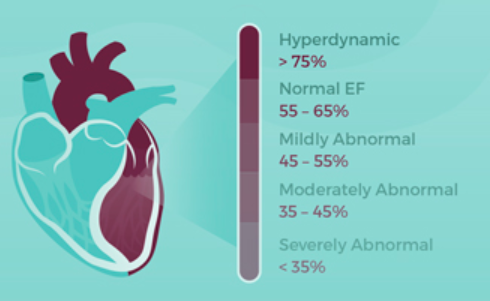



In [ ]:
# Get index of max and min volumes
tmax = np.argmax(ts)
tmin = np.argmin(ts)

# Plot the largest and smallest volumes
fig, axes = plt.subplots(2,1)
axes[0].imshow(vol_ts[tmax,4], vmax=160)
axes[1].imshow(vol_ts[tmin,4], vmax=160)
format_and_render_plots()


# Calculate ejection fraction
ej_vol = ts.max()-ts.min()
ej_frac = (ts.max()-ts.min()) / ts.max() 
print('Est. ejection volume (mm^3):', ej_vol)
print('Est. ejection fraction:', ej_frac)




### ***Translations***
In this chapter, we'll leverage data use data from the Open Access Series of Imaging Studies to compare the brains of different populations: young and old, male and female, healthy and diseased.

To start, center a single slice of a 3D brain volume (im). First, find the center point in the image array and the center of mass of the brain. Then, translate the image to the center.

This chapter's exercises have all had the following imports:
```
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
```

In [ ]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

### ***Rotations***
In cases where an object is angled or flipped, the image can be rotated. Using ndi.rotate(), the image is rotated from its center by the specified degrees from the right horizontal axis.
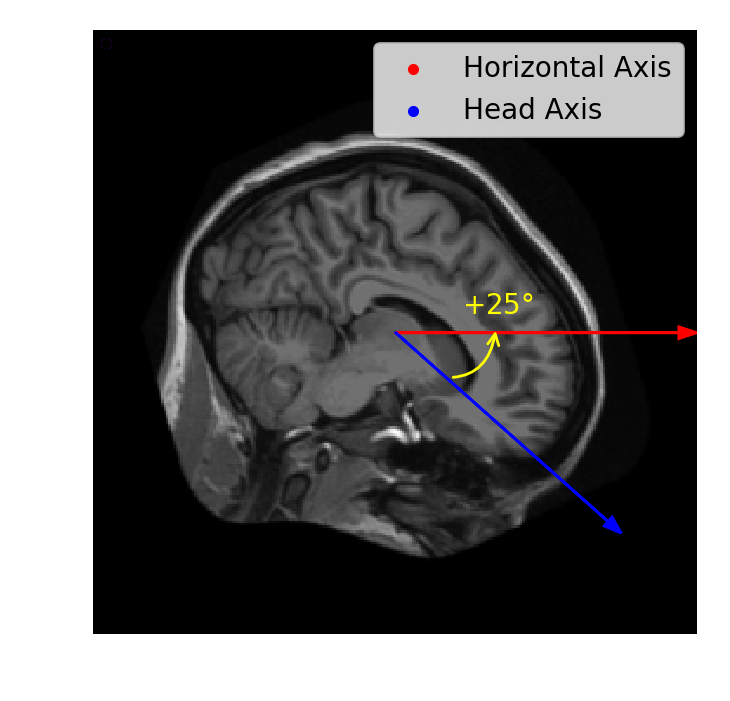


For this exercise, shift and rotate the brain image (im) so that it is roughly level and "facing" the right side of the image.

In [ ]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and transformed images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

### ***Resampling***
Images can be collected in a variety of shapes and sizes. Resampling is a useful tool when these shapes need to be made consistent. Two common applications are:

Downsampling: combining pixel data to decrease size
Upsampling: distributing pixel data to increase size
For this exercise, transform and then resample the brain image (im) to see how it affects image shape.

In [ ]:
# Center and level image
xfm = ndi.shift(im, shift=(-20, -20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4.00)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
format_and_render_plot()

### ***Interpolation***
Interpolation is how new pixel intensities are estimated when an image transformation is applied. It is implemented in SciPy using sets of spline functions.

Editing the interpolation order when using a function such as ndi.zoom() modifies the resulting estimate: higher orders provide more flexible estimates but take longer to compute.

For this exercise, upsample im and investigate the effect of different interpolation orders on the resulting image.

In [ ]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])
format_and_render_plots()

### ***Mean absolute error***
Cost functions and objective functions output a single value that summarizes how well two images match.

The mean absolute error (MAE), for example, summarizes intensity differences between two images, with higher values indicating greater divergence.

For this exercise, calculate the mean absolute error between im1 and im2 step-by-step.

In [ ]:
# Calculate image difference
err = im1-im2

# Plot the difference
plt.imshow(err , cmap='seismic',vmin=-200,vmax=200)
format_and_render_plot()

# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)